## Problem statement

###### Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Observations :-
 ##### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values.
The dataset consists of the crime data and the type of crime in United states.
We can see that the first column is unnamed here and so we will rename it with Location name.

In [6]:
crime_data.rename(columns = {crime_data.columns[0]:"Location"},inplace = True)

In [7]:
crime_data.head()

,Location,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
crime_data.shape

(50, 5)

In [9]:
crime_data.columns

Index(['Location', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Observations :-
There are total 50 observations and 5 columns. All columns are having non null values.
The data type of Location column is object, Murder and Rape is float, Assalut and UrbanPop is int.

In [12]:
crime_data[crime_data.duplicated()]

,Location,Murder,Assault,UrbanPop,Rape


#### We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

In [13]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Observations :-
The mean value and the median value (50% or percentile) are not having much difference between them for all the columns.
There is not a big difference in the 75% value and max value for all the columns except Rape. For Rape, the 75% value is at 26 but max value is 46 (almost double)
From observations 1 and 2, it looks like there is no outlier for Murder, Assault and UrbanPop. However, we can say there is a chance of outlier in Rape column. But we will be confirming that below with some other techniques (boxplot) as well.

## DATA VISUALISATION

### Boxplots

#### Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data. The outliers usually reduces the accuracy the model and might give incorrect predictions results.

<AxesSubplot:>

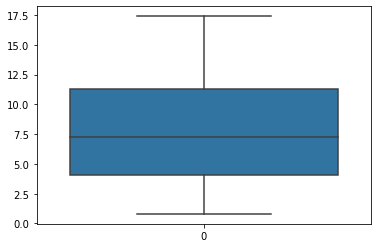

In [14]:
sns.boxplot(data=[crime_data["Murder"]])

### Observations :-
The boxplot of the feature Murder shows that it varies from a lowest value of 0 to highest of 17.5 (approx.)
There are no outliers in the data
The median line is slightly towards the left side (upper portion of box) which means that data is slightly positive skewed.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Assault'>

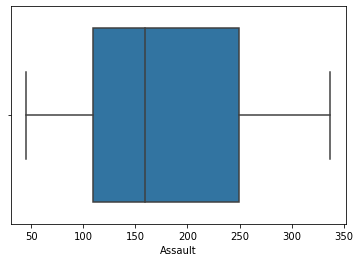

In [16]:
sns.boxplot(crime_data['Assault'])

#### Observations :-
The boxplot of the feature Assault shows that it varies from a lowest value of 100 (approx.) to highest of 250 (approx.)
There are no outliers in the data
The median line is slightly towards the left side (upper portion of box) which means that data is slightly positive skewed.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrbanPop'>

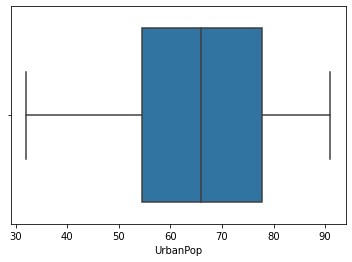

In [18]:
sns.boxplot(crime_data['UrbanPop'])

#### Observations :-
The boxplot of the feature UrbanPop shows that it varies from a lowest value of 55 (approx.) to highest of 78 (approx.)
There are no outliers in the data
The median line is almost at the centre so it looks like there is no skewness. But we will plot the distplot below to conclude.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

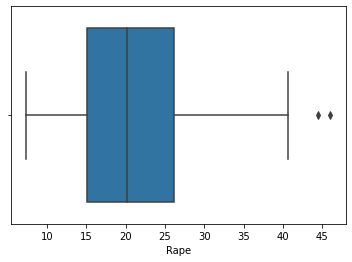

In [20]:
sns.boxplot(crime_data['Rape'])

### Observations :-
The boxplot of the feature Rape shows that it varies from a lowest value of 15 (approx.) to highest of 25 (approx.)
There are 2 outlier data points in the data which are having a value of around 45 (approx.)
The median line is almost at the centre so it looks like there is no skewness. But we will plot the distplot below to conclude.

### Distplots
We will plot a density plot which also helps the see the distribution of the data and give insight regarding skewness.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Assault', ylabel='Density'>

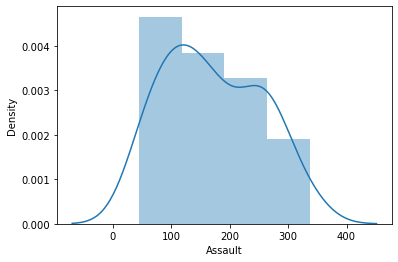

In [22]:
sns.distplot(crime_data["Assault"])

#### Observation :-
The above distplot for Assault shows positive skewness of the data distribution

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Murder', ylabel='Density'>

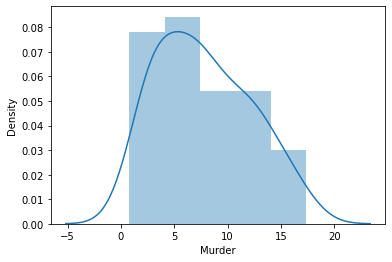

In [23]:
sns.distplot(crime_data['Murder'])

### Observation :-
The above distplot for Murder shows positive skewness of the data distribution

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

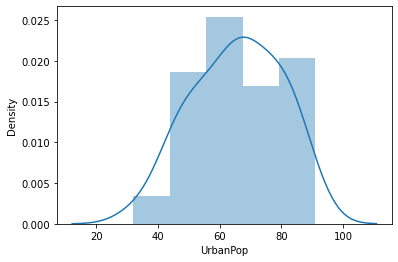

In [25]:
sns.distplot(crime_data['UrbanPop'])

### Observation :-
The above distplot for UrbanPop shows a very slight negative skewness

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rape', ylabel='Density'>

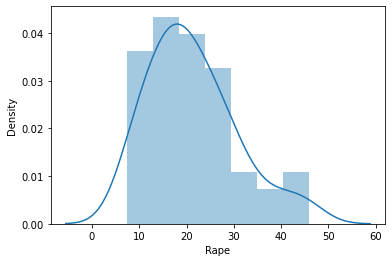

In [27]:
sns.distplot(crime_data['Rape'])

### Observations :-
The above distplot for Rape shows positive skewness of the data distribution

## Pairplots

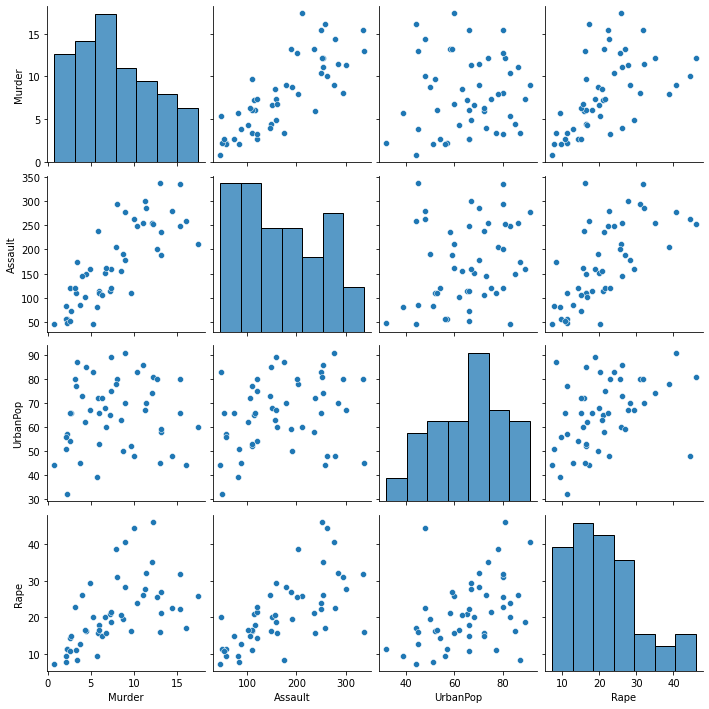

In [28]:
sns.pairplot(crime_data)

### Observations :-
From the above plot of Murder and Assault, we can observe with an increase in Murder there is an increase in Assault count as well. There is a positive correlation between them.
If we compare the Murder plot and UrbanPop plots, the points are very scattered but we can see there seems to be low positive correlation between them as well. We will be using correlation matrix further to conclude.
For Assault and UrbanPop as well it is the similar case as 2. We can see the points are very scattered, so we will be using a correlation matrix.
Between Murder and Rape , UrbanPop and Rape also it looks like there is a positive correlation. 

### Heatmap
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

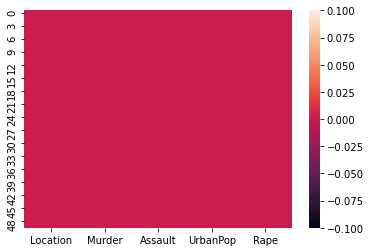

In [29]:
sns.heatmap(crime_data.isnull())

### Observations :-
We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

In [30]:
crime_data.isnull().sum()

Location    0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### Correlation
The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

<AxesSubplot:>

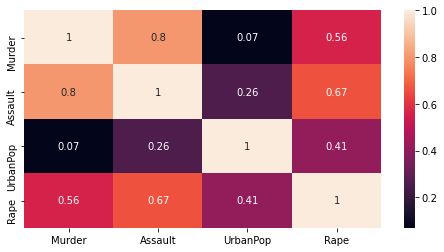

In [31]:
plt.figure(figsize=(8,4))
sns.heatmap(crime_data.corr(),annot=True)

In [32]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


### Observations :-
The correlation between Murder and Assault is positive with a value of 0.8 (strong correlation)
The correlation between Murder and Urbanpop is 0.06 which means there is no correlation between them.
The correlation between Murder and Rape is positive with a value of 0.56 (moderate correlation)
The correlation between Assault and UrbanPop is 0.26 which is low correlation.
The correlation between Assault and Rape is 0.66 which is positive moderate correltion
The correlation between UrbanPop and Rape is 0.4 which is positive low correlation

### Using K means clustering algorithm
We need to normalize our data as for each feature the data will be in different scale and will affect our output if we use it directly without normalizing

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaled_crime_data = pd.DataFrame(scaler.fit_transform(crime_data.iloc[:,1:]))

In [35]:
scaled_crime_data.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


### How to find optimum number of cluster
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion. The Elbow method is very effective technique to identify the number of clusters. The point where the line is very steep is choosed as the cluster size. 

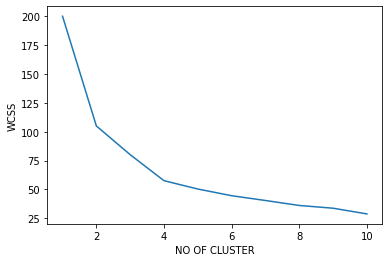

In [38]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=5)
    kmeans.fit(scaled_crime_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel("NO OF CLUSTER")
plt.ylabel("WCSS")
plt.show()

### Obervations :-
The line is very steep at the points 2 and 4 both.
We will choose the cluster size as 4 as it will give more variation to us

### Build Cluster algorithm

In [39]:
cluster_new = KMeans(n_clusters=4,random_state=42)
cluster_new.fit(scaled_crime_data)
cluster_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

## Assign Clusters to the dataset

In [40]:
crime_data["Cluster_id"] = cluster_new.labels_

In [41]:
crime_data.head()

,Location,Murder,Assault,UrbanPop,Rape,Cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [42]:
crime_data.groupby(["Cluster_id"]).agg(["mean"]).reset_index()

,Cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


### Observations :-
We can see that cluster id 2 i.e cluster 3 is having highest mean values for Assault, UrbanPop and Rape crime. There is higher rates of the this 3 type of crimes in all the locations (Alaska, Arizona,California,etc) coming under cluster 2.
The highest Murder rates are in the cities falling under cluster 4. The Assault rates are also high in cluster 4 areas.
If we compare all the mean values for the clusters and crime type, we can observe that the crime rates are very less in cluster 2.
The number of UrbanPop type of crime is almost equal in cluster 0 and cluster 1 areas.

In [44]:
crime_data.groupby(["Cluster_id"]).agg(["median"]).reset_index()

,Cluster_id,Murder,Assault,UrbanPop,Rape
,,median,median,median,median
0,0,13.80,242.5,54.0,21.7
1,1,5.95,147.0,72.5,19.4
2,2,2.60,81.0,53.0,11.3
3,3,11.10,255.0,80.0,31.9


### Observations :-
We have aggregrated by median values as well so that our observations are not affected by outlier data. We can see that the median values are almost same as mean and the observations remain same

In [45]:
crime_data.groupby(["Cluster_id"]).agg(["count"]).reset_index()

,Cluster_id,Location,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,8,8,8,8,8
1,1,16,16,16,16,16
2,2,13,13,13,13,13
3,3,13,13,13,13,13


### Observations :-
Cluster 4 has the least number of locations count. There are only 8 cities under cluster 4.

In [46]:
crime_data[crime_data["Cluster_id"]==0]

,Location,Murder,Assault,UrbanPop,Rape,Cluster_id
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


(array([ 8.,  0.,  0., 16.,  0.,  0., 13.,  0.,  0., 13.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

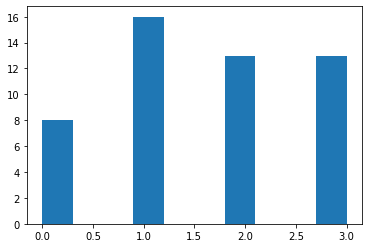

In [48]:
plt.hist(crime_data['Cluster_id'])